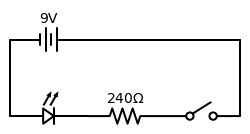

In [38]:
import schemdraw
import schemdraw.elements as elm
d = schemdraw.Drawing(unit=2.5)
d += elm.Battery().left().label('9V')
d += elm.Line().down()
d += elm.LED().right()
d += elm.RES().right().label('$240\Omega$')
d += elm.Switch().right()
d += elm.Line().up()
d += elm.Line().left().length(5)
d.draw()
d.save('1_resistor_no_loops.png')
#d.save('1_resistor_no_loops.pdf')
d

In [56]:
import warnings
warnings.filterwarnings('ignore')

from ipywidgets import FloatSlider, link, VBox, Tab
# import ipywidgets as widgets
from IPython.display import display, clear_output
from ipysheet import sheet, cell, row, column, cell_range


sheet1 = sheet(rows=1, columns=2, column_headers=["Vs", "R"], row_headers=False)

Vs = FloatSlider(
         value=1,
         min=0,
         max=20,
         step=1,
        orientation='vertical')

R = FloatSlider(value=1,
         min=0,
         max=25,
         step=1, orientation='vertical')

column1 = cell(0, 0, Vs)
column2 = cell(0, 1, R)

sheet1



Sheet(cells=(Cell(column_end=0, column_start=0, row_end=0, row_start=0, type='widget', value=FloatSlider(value…

In [70]:
import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# Load the package for drawing graphs.
import matplotlib.pyplot as plt
# Omit the following line if you're not using a Jupyter notebook.
%matplotlib inline

# Load the SKiDL + PySpice packages and initialize them for doing circuit simulations.
from skidl.pyspice import *
print(lib_search_paths)

{'kicad': ['.'], 'skidl': ['.', '/Users/samtaylek/opt/anaconda3/lib/python3.8/site-packages/skidl/libs'], 'spice': ['.']}


   V    I (mA)
  0.00  -0.00
  1.00   4.17
  2.00   8.33
  3.00  12.50
  4.00  16.67
  5.00  20.83
  6.00  25.00
  7.00  29.17
  8.00  33.33
  9.00  37.50
 10.00  41.67
 11.00  45.83
 12.00  50.00



No errors or warnings found during netlist generation.



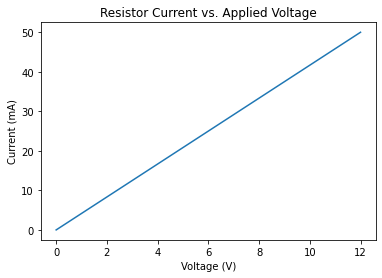

In [71]:
reset() # This will clear any previously defined circuitry.
vs = V(ref='VS', dc_value = Vs.value@u_V)  # Create a voltage source named "VS" with an initial value of 9 volt.
r1 = R(value = 240@u_Ohm)            # Create a  240ohm resistor.
vs['p'] += r1[1]
gnd += vs['n'], r1[2]

# Simulate the circuit.
circ = generate_netlist()              # Translate the SKiDL code into a PyCircuit Circuit object.
sim = circ.simulator()                 # Create a simulator for the Circuit object.
dc_vals = sim.dc(VS=slice(0, Vs.value, 1))  # Run a DC simulation where the voltage ramps from 0 to 1V by 1V increments.

# Get the voltage applied to the resistor and the current coming out of the voltage source.
voltage = dc_vals[node(vs['p'])]       # Get the voltage applied by the positive terminal of the source.
current = -dc_vals['VS']               # Get the current coming out of the positive terminal of the voltage source.

# Print a table showing the current through the resistor for the various applied voltages.
print('{:^7s}{:^7s}'.format('V', ' I (mA)'))
print('='*15)
for v, i in zip(voltage.as_ndarray(), current.as_ndarray()*1000):
    print('{:6.2f} {:6.2f}'.format(v, i))
    
#  Create a plot of the current (Y coord) versus the applied voltage (X coord).
figure = plt.figure(1)
plt.title('Resistor Current vs. Applied Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.plot(voltage, current*1000) # Plot X=voltage and Y=current (in milliamps, so multiply it by 1000).
plt.show()